<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5505-Advanced-Machine-Learning-for-Data-Scientists-/blob/main/Muktinutalapati_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import essential libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as gb 
import cv2
import os, random
import seaborn as sns
from keras.preprocessing import image
import sklearn


In [ ]:
# Checking the GPU installed
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
# Install Kaggle library
!pip install -q kaggle

# Loading kaggle API key file
!cd ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# Downloading the dataset from Kaggle
!kaggle datasets download -d datasets/puneet6060/intel-image-classification
# Unzipping the dataset
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
# Executing steps to download the dataset related to images
!rm -d ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification

rm: cannot remove '/root/.kaggle': Directory not empty
mkdir: cannot create directory ‘/root/.kaggle’: File exists
intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Directory paths
train_path = '/content/seg_train/seg_train'
test_path = '/content/seg_test/seg_test'
pred_path = '/content/seg_pred/seg_pred'

In [ ]:
os.listdir(train_path)

['street', 'mountain', 'sea', 'forest', 'buildings', 'glacier']

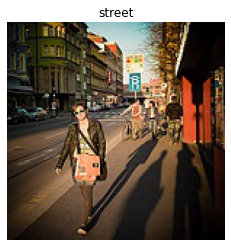

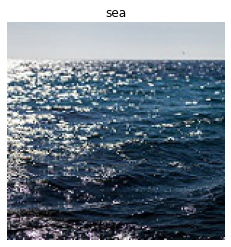

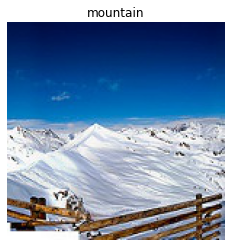

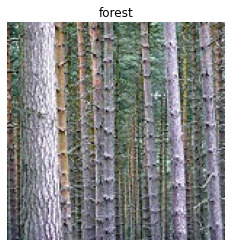

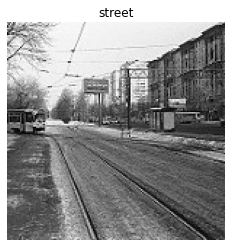

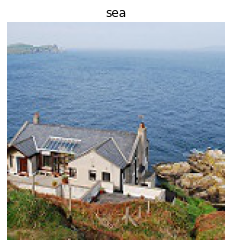

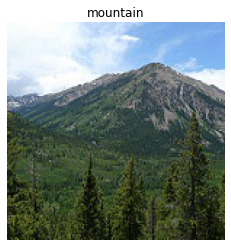

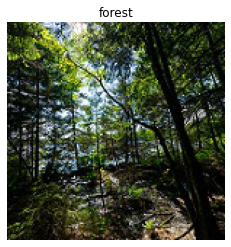

In [ ]:
# Showing some images to observe
def show_pictures(path,class_):
    selected_fpath = random.choice(gb.glob(pathname = path+ '/'+ class_+'/*.jpg'))
    img = image.load_img(selected_fpath, target_size=(150, 150))
    ## Encoding image into integer in the 0–255 range
    image_tensor = image.img_to_array(img)  
    # Nomalizing the pixel in [0, 1]
    image_tensor /= 255 
    plt.imshow(image_tensor)
    plt.title(class_)
    plt.axis("off")
    plt.show()

for i in range(0,2):
    show_pictures(train_path, 'street')
    show_pictures(train_path, 'sea')
    show_pictures(test_path, 'mountain')
    show_pictures(test_path, 'forest')

In [ ]:
# Exploring sizes of the training, testing and prediction sets
def exploring_size (path):
  size =0
  try:
    for name in os.listdir(path):
      size += len(os.listdir(path + '/' + name))
  except:
    size += len(os.listdir(path))
  return size

print('The number of images in the training set: ', exploring_size(train_path))
print('The number of images in the test set: ', exploring_size(test_path))
print('The number of images in the prediction set: ', exploring_size(pred_path))

The number of images in the training set:  14034
The number of images in the test set:  3000
The number of images in the prediction set:  7301


In [ ]:
# Exploring data's labels 
folder_names = os.listdir(train_path)
print('All labels: ', folder_names)

# Exploring data distribution in the training set
print ('-'*30, '\nData distributed in the training set:')
for name in folder_names:
  print (name, ': ', len(os.listdir(train_path + '/' + name)))

# Exploring data distributed in the test set
print ('-'*30, '\nData distributed in the test set:')
for name in folder_names:
  print (name, ': ', len(os.listdir(test_path + '/' + name)))

All labels:  ['street', 'mountain', 'sea', 'forest', 'buildings', 'glacier']
------------------------------ 
Data distributed in the training set:
street :  2382
mountain :  2512
sea :  2274
forest :  2271
buildings :  2191
glacier :  2404
------------------------------ 
Data distributed in the test set:
street :  501
mountain :  525
sea :  510
forest :  474
buildings :  437
glacier :  553


In [ ]:
# Exploring the images' sizes
def explore_image_size (path):
  size = []
  for name in os.listdir(path):
    file_paths = gb.glob(pathname = path+ '/'+ name+'/*.jpg')
    for p in file_paths:
      size.append(plt.imread(p).shape)
  return pd.DataFrame(size, columns = ['H', 'W', 'D']).value_counts()
  
print('Image sizes in the training set\n',  explore_image_size (train_path))
print('\nImage sizes in the test set\n',  explore_image_size (test_path))


Image sizes in the training set
 H    W    D
150  150  3    13986
113  150  3        7
111  150  3        3
135  150  3        3
146  150  3        2
144  150  3        2
108  150  3        2
134  150  3        2
142  150  3        2
123  150  3        2
136  150  3        2
143  150  3        2
145  150  3        1
147  150  3        1
149  150  3        1
141  150  3        1
140  150  3        1
76   150  3        1
133  150  3        1
131  150  3        1
81   150  3        1
120  150  3        1
119  150  3        1
115  150  3        1
110  150  3        1
105  150  3        1
103  150  3        1
102  150  3        1
100  150  3        1
97   150  3        1
124  150  3        1
dtype: int64

Image sizes in the test set
 H    W    D
150  150  3    2993
72   150  3       1
76   150  3       1
81   150  3       1
110  150  3       1
131  150  3       1
141  150  3       1
149  150  3       1
dtype: int64


In [ ]:
# Preprocessing the train and test data
## Creating generator models for preprocessing and data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1./255,    
                                      shear_range = 0.2,
                                      rotation_range=20,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)
test_generator = ImageDataGenerator(rescale = 1./255)

## Passing the data over the generator model
train_generated = train_generator.flow_from_directory(train_path,
                                                      target_size = (64,64),
                                                      class_mode = 'sparse',
                                                      shuffle = True,
                                                      batch_size=32)
test_generated = test_generator.flow_from_directory(test_path, 
                                                    target_size = (64,64),
                                                    class_mode = 'sparse',
                                                    shuffle=False,
                                                    batch_size=32)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
# Getting classes encoded
label_encoding = train_generated.class_indices
label_encoding

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
# Getting images and labels stored in two lists 

## Defining a function for getting both images (x) and labels (y)
def get_xy (path):
  X, y = [],[]
  for name in os.listdir(path):
    file_paths = gb.glob(pathname = path+ '/'+ name+'/*.jpg')
    for p in file_paths:
      image = plt.imread(p)
      resized_image = cv2.resize(image,(64,64) )
      X.append(resized_image)
      y.append(label_encoding[name])
  return X, y

## Defining a function for getting only images (x) since prediction set has no labels
def get_x (path):
  X = []
  for name in os.listdir(path):
    path_file = path+'/'+ name
    image = plt.imread(path_file)
    resized_image = cv2.resize(image,(64,64) )
    X.append(resized_image)
  return X 

# For images in the training set
X_train, y_train = get_xy (train_path)
print('The number of images in the training set:', len(X_train), len(y_train))

#For images in the predicting set
X_pred = get_x (pred_path)
print('The number of images in the predicting set:', len(X_pred))

The number of images in the training set: 14034 14034
The number of images in the predicting set: 7301


In [ ]:
# Converting data lists into arrays, and shuffling them
from sklearn.utils import shuffle
X_train, y_train = sklearn.utils.shuffle(np.array(X_train), np.array(y_train), random_state = 42)
X_pred = np.array(X_pred)

print('The shape of X_train:', X_train.shape)
print('The shape of y_train:', y_train.shape)
print('The shape of X_pred:', X_pred.shape)

The shape of X_train: (14034, 64, 64, 3)
The shape of y_train: (14034,)
The shape of X_pred: (7301, 64, 64, 3)


In [ ]:
# Creating the architecture of the CNN model
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

## Defining a CNN model
def define_cnn():
  # Creating the model
  cnn = Sequential()

  # Convolution 1
  cnn.add(Conv2D(32, (3,3), activation='relu', input_shape = (64,64,3)))
  # Maxpooling 1
  cnn.add(MaxPooling2D(pool_size = (2,2)))

  # Convolution 2
  cnn.add(Conv2D(64, (3,3), activation = 'relu'))
  # Maxpooling 2
  cnn.add(MaxPooling2D(pool_size = (2,2)))

  # Convolution 3
  cnn.add(Conv2D(64, (3,3), activation = 'relu'))
  #  Maxpooling 3
  cnn.add(MaxPooling2D(pool_size = (2,2)))

  # Flatten
  cnn.add(Flatten())
  
  # Fully-connected NN layer
  cnn.add(Dense(32, activation = 'relu'))
  cnn.add(Dense(16, activation = 'relu'))
  cnn.add(Dense(6, activation = 'softmax'))
  return cnn


In [ ]:
# Defining 10-fold cross validation for validating the model in the training set
kfold = KFold(n_splits = 10, shuffle = True)
fold_accuracy = []
fold_loss = []
fold = 1

for train, test in kfold.split(np.zeros(len(y_train)),y_train): ## kfold.split just splitting the data indices into fold, so we can use np.zero for getting the indices
  ## Applying the data generator models to process data 
  train_generated = train_generator.flow(X_train[train], y_train[train], batch_size=32)
  val_generated = test_generator.flow(X_train[test], y_train[test], batch_size=32)
  
  ## Creating the cnn model
  cnn = define_cnn()
  
  ## Compiling the model
  cnn.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])
  print ('-'*35, '\nTraining on fold {}'.format(fold))

  ## Fitting the model into the training set
  history = cnn.fit(train_generated,  
                    epochs = 5,
                    validation_data=(val_generated) )
  
  ## Creating validation metrics
  scores = cnn.evaluate(val_generated, verbose=1)
  print(f"Score of fold: {fold}: {cnn.metrics_names[0]} is {scores[0]}, {cnn.metrics_names[1]} is {scores[1]}")
  
  ## Getting loss and accuracy scores of all folds
  fold_loss.append(scores[0])
  fold_accuracy.append(scores[1])
  fold += 1

# Printing the average scores of 10 folders to get the generalized scores of the model
print('-'*35)
print('The generalized scores of the model:')
print('Accuracy: ', np.mean(fold_accuracy))
print('Loss: ', np.mean(fold_loss))


----------------------------------- 
Training on fold 1
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 28s 48ms/step - loss: 1.1620 - accuracy: 0.5295 - val_loss: 1.0282 - val_accuracy: 0.5783
Epoch 2/5
395/395 [==============================] - 19s 48ms/step - loss: 0.9340 - accuracy: 0.6391 - val_loss: 0.9170 - val_accuracy: 0.6574
Epoch 3/5
395/395 [==============================] - 21s 52ms/step - loss: 0.8221 - accuracy: 0.6870 - val_loss: 0.8030 - val_accuracy: 0.6923
Epoch 4/5
395/395 [==============================] - 19s 47ms/step - loss: 0.7509 - accuracy: 0.7226 - val_loss: 0.6752 - val_accuracy: 0.7422
Epoch 5/5
44/44 [==============================] - 0s 8ms/step - loss: 0.7005 - accuracy: 0.7393
Score of fold: 1: loss is 0.7004929780960083, accuracy is 0.7393162250518799
----------------------------------- 
Training on fold 2
Epoch 1/5
395/395 [==============================] - 20s 49ms/step - loss: 1.1671 - accuracy: 0.5277 - val_loss: 0.9575 - val_accuracy: 0.6410
Epoch 2/5
395/395 [==============================] - 19s 49ms/ste

In [ ]:
cnn.summary()
print('The number of layers: ', len(cnn.layers))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)        

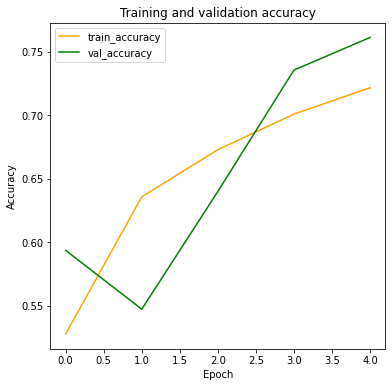

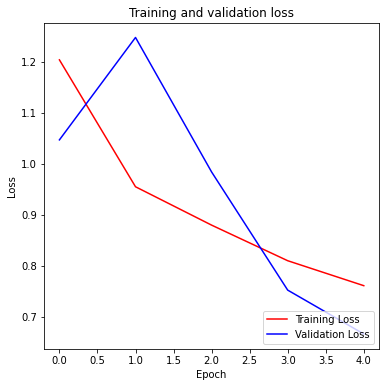

In [ ]:
# Plotting the performance of the model over training
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'],'orange', label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

plt.figure(figsize=(6,6))
plt.plot( history.history['loss'], 'r', label='Training Loss')
plt.plot( history.history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Fitting the model in the whole training set
cnn.fit(train_generated, epochs = 5,  verbose = 1)
# Observing the performance of the model on the testing set 
model_loss, model_accuracy = cnn.evaluate(test_generated)
print('Loss is: ', model_loss)
print('Accuracy is: ', model_accuracy)

Epoch 1/5
395/395 [==============================] - 22s 56ms/step - loss: 0.7091 - accuracy: 0.7452
Epoch 2/5
395/395 [==============================] - 19s 47ms/step - loss: 0.6835 - accuracy: 0.7526
Epoch 3/5
395/395 [==============================] - 19s 47ms/step - loss: 0.6557 - accuracy: 0.7635
Epoch 4/5
395/395 [==============================] - 19s 47ms/step - loss: 0.6265 - accuracy: 0.7727
Epoch 5/5
395/395 [==============================] - 20s 52ms/step - loss: 0.6043 - accuracy: 0.7820


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


94/94 [==============================] - 4s 39ms/step - loss: 0.6232 - accuracy: 0.7790
Loss is:  0.6232395172119141
Accuracy is:  0.7789999842643738


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Applying the model to predict on the test set
y_pred = np.argmax(cnn.predict(test_generated), axis=-1) 
y_true = test_generated.classes

# Printing class
print(classification_report(y_true, y_pred, target_names=label_encoding))


              precision    recall  f1-score   support

   buildings       0.68      0.81      0.74       437
      forest       0.96      0.84      0.90       474
     glacier       0.81      0.72      0.76       553
    mountain       0.81      0.66      0.73       525
         sea       0.74      0.79      0.76       510
      street       0.73      0.87      0.79       501

    accuracy                           0.78      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.79      0.78      0.78      3000



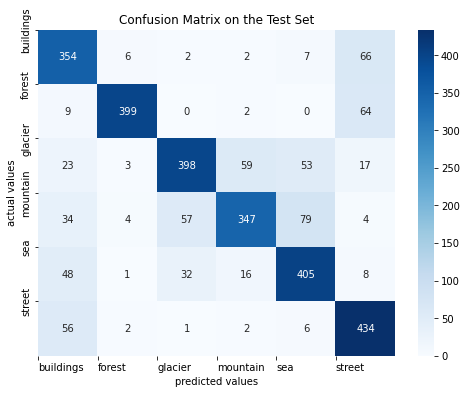

In [ ]:
# Evaluating the model with confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

## Visualizing the confusion matrix
label_names = [k for k in label_encoding.keys()]
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot = True, fmt=".0f", cmap = 'Blues' )
tick_marks = np.arange(len(label_names))
plt.xticks(tick_marks, label_names, horizontalalignment='left')
plt.yticks(tick_marks, label_names)
plt.xlabel ('predicted values')
plt.ylabel ('actual values')
plt.title('Confusion Matrix on the Test Set')
plt.show()

In [ ]:
# Preprocessing the images in the prediction set for prediction
pred_generator = ImageDataGenerator(rescale = 1./255)
pred_generated = pred_generator.flow(X_pred, batch_size=32, shuffle = False)

# Applying the model to predict
y_pred = cnn.predict(pred_generated, batch_size=32)


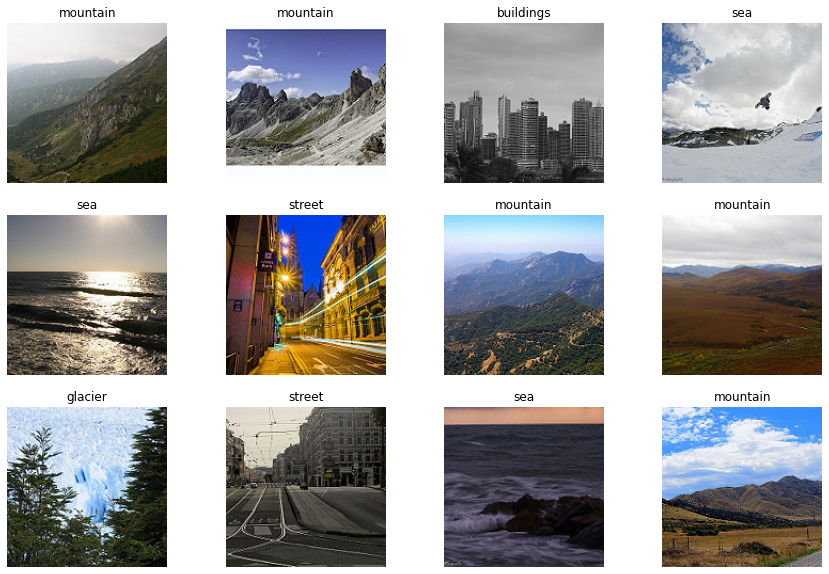

In [ ]:
# Defining the function for predicting the unseen data
from skimage import transform

def load_image(path):
  file_path = random.choice(gb.glob(pathname = path+'/*.jpg'))
  img = image.load_img(file_path, target_size=(150, 150))
  np_image = np.array(img).astype('float32')/255
  np_image = transform.resize(np_image, (64, 64, 3))
  np_image_exp = np.expand_dims(np_image, axis=0)
  return img,np_image_exp

# Getting the encoded classes and labels
classes_decoded = dict([(v, k) for k, v in label_encoding.items()])

# Randomly picking up 12 images for predicting
plt.figure(figsize=(15,10))
for i in range (12):
  ax = plt.subplot(3,4,i+1)
  img = load_image(pred_path)
  label=np.argmax(cnn.predict(img[1]), axis=-1)
  plt.title(classes_decoded[int(label)])
  plt.imshow(img[0])
  plt.axis("off")

In [ ]:
#from tensorflow.keras.applications import ResNet50V2
import keras
keras.applications.resnet_v2.ResNet50V2()
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

102883328/102869336 [==============================] - 3s 0us/step


In [ ]:
# Preprocessing data
train_generator = ImageDataGenerator(rescale = 1./255,    
                                      shear_range = 0.2,
                                      rotation_range=20,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      validation_split=0.2) # setting 20% training dataset split for validation

train_generated = train_generator.flow_from_directory(train_path, 
                                     target_size = (150,150),
                                     class_mode = 'sparse',
                                     batch_size = 32, 
                                     shuffle=True,
                                     subset='training') # Setting the subset for training 
val_generated = train_generator.flow_from_directory(train_path, 
                                     target_size = (150,150),
                                     class_mode = 'sparse',
                                     batch_size = 32, 
                                     shuffle=True,
                                     subset='validation')  # Setting the subset for validation

# Noted that we will not do data augmentation for the testing set
test_generator = ImageDataGenerator(rescale=1./255)                           
test_generated = test_generator.flow_from_directory(test_path, 
                                     target_size = (150,150),
                                     class_mode = 'sparse',
                                     shuffle = False)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
# Loading the pretrained model, but only including the convolution base, and excluding the fully-connect layers
base_conv = ResNet50V2(input_shape=(150,150, 3), 
                     include_top=False, 
                     weights='imagenet')

# Freezing the convolution layers in the pretrained model for not retraining
number_layers = 150
for layers in base_conv.layers[:number_layers]:
    layers.trainable = False

# Observe the architecture of the pretrained model
base_conv.summary()
print('The number of layers: ', len(base_conv.layers))

94683136/94668760 [==============================] - 3s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2

In [ ]:
# Building the fully-connect neural network layers on top of the convolution base of the pretrained model
top_model = base_conv
top_model = top_model.output
top_model = tf.keras.layers.GlobalMaxPooling2D()(top_model)
top_model = tf.keras.layers.Flatten(name="Flatten")(top_model)
top_model = tf.keras.layers.Dense(1024, activation='relu')(top_model)
top_model = tf.keras.layers.Dropout(0.2)(top_model)
prediction_layer = tf.keras.layers.Dense(6, activation='softmax')(top_model)
## Groupping together input and output for building the transfered model we are supposed to build
tf_model = tf.keras.Model(inputs=base_conv.input, outputs=prediction_layer)

In [ ]:
# Compiling the model
tf_model.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = 'accuracy')

tf_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']         

In [ ]:
# Training the model
## Fitting the model into the data for training
history = tf_model.fit(train_generated, 
                     epochs = 5,
                     validation_data =val_generated,
                     batch_size = 32)
# Observing the performance of the model on the testing set 
model_loss, model_accuracy = tf_model.evaluate(test_generated)
print('Loss is: ', model_loss)
print('Accuracy is: ', model_accuracy)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


351/351 [==============================] - 122s 329ms/step - loss: 0.7835 - accuracy: 0.8288 - val_loss: 0.3562 - val_accuracy: 0.8887
Epoch 2/5
351/351 [==============================] - 109s 312ms/step - loss: 0.5596 - accuracy: 0.8830 - val_loss: 1.9140 - val_accuracy: 0.8449
Epoch 3/5
351/351 [==============================] - 109s 311ms/step - loss: 0.4296 - accuracy: 0.8856 - val_loss: 0.2893 - val_accuracy: 0.8894
Epoch 4/5
351/351 [==============================] - 109s 311ms/step - loss: 0.3054 - accuracy: 0.9024 - val_loss: 0.3055 - val_accuracy: 0.9098
Epoch 5/5
94/94 [==============================] - 12s 126ms/step - loss: 0.2710 - accuracy: 0.9043
Loss is:  0.27103471755981445
Accuracy is:  0.9043333530426025


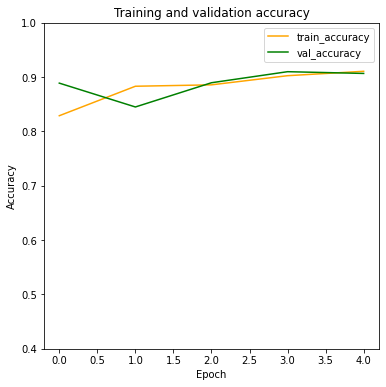

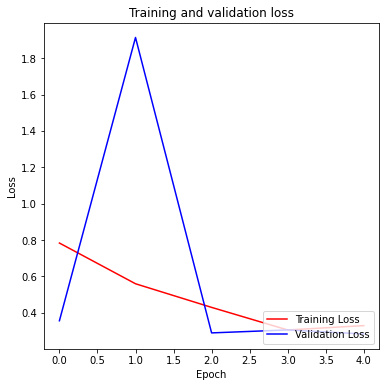

In [ ]:
# Plotting the performance of the model over training
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'],'orange', label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.4, 1])
plt.title('Training and validation accuracy')
plt.show()

plt.figure(figsize=(6,6))
plt.plot( history.history['loss'], 'r', label='Training Loss')
plt.plot( history.history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Testing the perfomance of the transfered model on the testing set that we have not touched when training
from sklearn.metrics import confusion_matrix, classification_report
## Getting the actual classes of the testing set
y_true = test_generated.classes
## Getting the label names of images
label_names = test_generated.class_indices
## Applying the model to predict on the test set
y_pred = np.argmax(tf_model.predict(test_generated), axis=-1) 
## Printing class
print(classification_report(y_true, y_pred,  target_names=label_names))


              precision    recall  f1-score   support

   buildings       0.91      0.91      0.91       437
      forest       0.97      0.99      0.98       474
     glacier       0.88      0.83      0.85       553
    mountain       0.84      0.87      0.85       525
         sea       0.90      0.93      0.92       510
      street       0.94      0.91      0.93       501

    accuracy                           0.90      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.90      0.90      0.90      3000



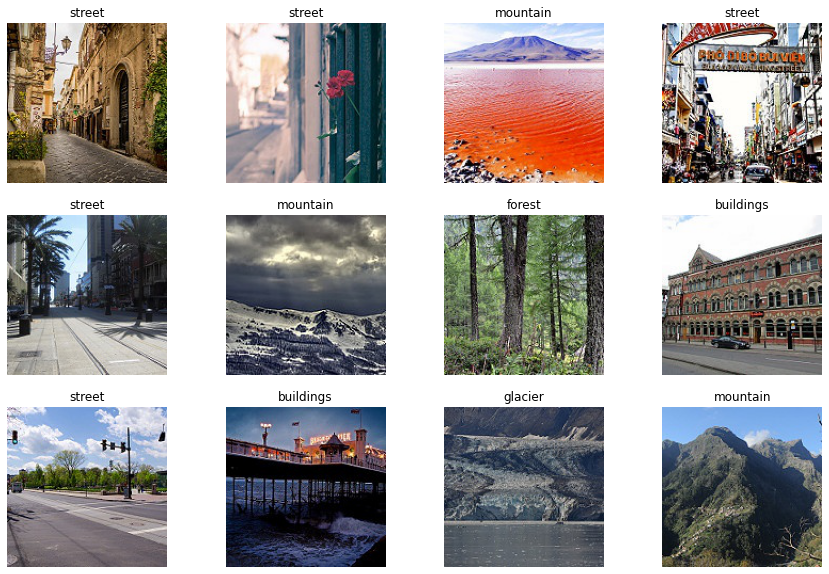

In [ ]:
# Defining the function for predicting the unseen data
#import PIL
#from PIL import Image
#from skimage import transform

def load_image(path):
  file_path = random.choice(gb.glob(pathname = path+'/*.jpg'))
  img = image.load_img(file_path, target_size=(150, 150))
  np_image = np.array(img).astype('float32')/255
  np_image_exp = np.expand_dims(np_image, axis=0)
  return img,np_image_exp

# Getting the encoded classes and labels
classes_decoded = dict([(v, k) for k, v in train_generated.class_indices.items()])

# Randomly picking up 12 images in the prediction set to predict
plt.figure(figsize=(15,10))
for i in range (12):
  ax = plt.subplot(3,4,i+1)
  img = load_image(pred_path)
  label=np.argmax(tf_model.predict(img[1]), axis=-1)
  plt.title(classes_decoded[int(label)])
  plt.imshow(img[0])
  plt.axis("off")